<a href="https://colab.research.google.com/github/R-Damanhuri/Machine-Learning/blob/main/Caregiver-Recommendation/Model-Development/Caregiver_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/R-Damanhuri/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 43 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), 406.41 KiB | 3.95 MiB/s, done.


In [4]:
import pandas as pd

# Read excel file with sheet name
cbf_dataset = pd.read_excel('/content/Machine-Learning/Caregiver-Recommendation/Data-Collecting/CareGiver_Recommender_Dataset.xlsx', 
              sheet_name=['Dataset Lansia','Dataset Caregiver'])

In [5]:
# Get DataFrame from Dict
lansia_df = cbf_dataset.get('Dataset Lansia')
caregiver_df = cbf_dataset.get('Dataset Caregiver')

In [6]:
lansia_df.shape

(2000, 22)

In [7]:
lansia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   id                                       2000 non-null   int64 
 1   Mobilitas                                2000 non-null   int64 
 2   Penyakit lain                            2000 non-null   int64 
 3   Hipertensi                               2000 non-null   int64 
 4   Diabetes                                 2000 non-null   int64 
 5   Reumatik                                 2000 non-null   int64 
 6   Penyakit jantung                         2000 non-null   int64 
 7   Asma                                     2000 non-null   int64 
 8   Stroke                                   2000 non-null   int64 
 9   Mengurus rumah                           2000 non-null   int64 
 10  Membantu pergerakan dan aktivitas fisik  2000 non-null   int

In [8]:
lansia_df.head()

,id,Mobilitas,Penyakit lain,Hipertensi,Diabetes,Reumatik,Penyakit jantung,Asma,Stroke,Mengurus rumah,...,Mengecek kesehatan rutin secara mandiri,Mendampingi dan menjaga,Memasangkan alat medis khusus,Memeriksakan rutin ke dokter,Indonesia,Inggris,Jawa,Sunda,Melayu,Kota
0,1,1,0,0,0,0,0,0,0,3,...,2,4,1,1,1,1,1,1,0,KABUPATEN PEMALANG
1,2,2,1,1,0,0,0,0,0,3,...,2,4,3,3,0,0,0,1,0,KABUPATEN NDUGA
2,3,1,0,1,0,1,0,0,1,4,...,4,1,4,4,1,0,1,1,0,KOTA MAKASSAR
3,4,1,0,0,0,0,0,0,1,3,...,1,1,3,1,0,0,0,1,1,KABUPATEN BANYUWANGI
4,5,5,0,0,0,0,0,0,0,1,...,3,2,1,2,1,1,0,0,1,KABUPATEN ACEH UTARA


In [9]:
caregiver_df.shape

(2000, 22)

In [10]:
caregiver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       2000 non-null   int64  
 1   Jenis kelamin                            2000 non-null   int64  
 2   Pendidikan terakhir                      2000 non-null   int64  
 3   Lama pengalaman (tahun)                  2000 non-null   int64  
 4   Jumlah lansia pernah dirawat             2000 non-null   int64  
 5   Umur                                     2000 non-null   int64  
 6   Keahlian                                 2000 non-null   float64
 7   Mengurus rumah                           2000 non-null   int64  
 8   Membantu pergerakan dan aktivitas fisik  2000 non-null   int64  
 9   Membantu konsumsi obat dan makanan       2000 non-null   int64  
 10  Mengecek kesehatan rutin secara mandiri  2000 no

In [11]:
caregiver_df.head()

,id,Jenis kelamin,Pendidikan terakhir,Lama pengalaman (tahun),Jumlah lansia pernah dirawat,Umur,Keahlian,Mengurus rumah,Membantu pergerakan dan aktivitas fisik,Membantu konsumsi obat dan makanan,...,Memasangkan alat medis khusus,Memeriksakan rutin ke dokter,Indonesia,Inggris,Jawa,Sunda,Melayu,Kota,Gaji,Matching
0,1,1,5,12,4,33,0.14,0,0,1,...,1,1,1,1,0,0,0,KOTA BANDAR LAMPUNG,1060000,0.618680
1,2,1,5,13,12,36,0.43,1,0,1,...,1,0,1,1,1,0,1,KABUPATEN BOJONEGORO,830000,0.604606
2,3,0,1,1,1,24,0.71,0,1,1,...,0,1,1,1,0,0,0,KOTA SORONG,1590000,0.675971
3,4,0,2,4,0,39,0.86,1,1,1,...,1,1,1,0,0,1,0,KABUPATEN KEPULAUAN SULA,1820000,0.646133
4,5,0,1,2,0,35,0.00,1,0,0,...,0,1,1,0,0,1,0,KABUPATEN SERDANG BEDAGAI,1930000,0.956317


In [12]:
lansia_num = lansia_df.loc[:, ~lansia_df.columns.isin(['id','Kota'])].copy()
caregiver_num = caregiver_df.loc[:, ~caregiver_df.columns.isin(['id', 'Matching','Kota'])].copy()

lansia_city = lansia_df.loc[:, lansia_df.columns == 'Kota'].copy()
caregiver_city = caregiver_df.loc[:, caregiver_df.columns == 'Kota'].copy()

y_matching = caregiver_df.loc[:, caregiver_df.columns == 'Matching'].copy()

In [13]:
lansia_num.columns

Index(['Mobilitas', 'Penyakit lain', 'Hipertensi', 'Diabetes', 'Reumatik',
       'Penyakit jantung', 'Asma', 'Stroke', 'Mengurus rumah',
       'Membantu pergerakan dan aktivitas fisik',
       'Membantu konsumsi obat dan makanan',
       'Mengecek kesehatan rutin secara mandiri', 'Mendampingi dan menjaga',
       'Memasangkan alat medis khusus', 'Memeriksakan rutin ke dokter',
       'Indonesia', 'Inggris', 'Jawa', 'Sunda', 'Melayu'],
      dtype='object')

In [14]:
caregiver_num.columns

Index(['Jenis kelamin', 'Pendidikan terakhir', 'Lama pengalaman (tahun)',
       'Jumlah lansia pernah dirawat', 'Umur', 'Keahlian', 'Mengurus rumah',
       'Membantu pergerakan dan aktivitas fisik',
       'Membantu konsumsi obat dan makanan',
       'Mengecek kesehatan rutin secara mandiri', 'Mendampingi dan menjaga',
       'Memasangkan alat medis khusus', 'Memeriksakan rutin ke dokter',
       'Indonesia', 'Inggris', 'Jawa', 'Sunda', 'Melayu', 'Gaji'],
      dtype='object')

In [15]:
lansia_city.head()

,Kota
0,KABUPATEN PEMALANG
1,KABUPATEN NDUGA
2,KOTA MAKASSAR
3,KABUPATEN BANYUWANGI
4,KABUPATEN ACEH UTARA


In [16]:
caregiver_city.head()

,Kota
0,KOTA BANDAR LAMPUNG
1,KABUPATEN BOJONEGORO
2,KOTA SORONG
3,KABUPATEN KEPULAUAN SULA
4,KABUPATEN SERDANG BEDAGAI


In [17]:
from sklearn.preprocessing import StandardScaler

lansia_num_scaled = lansia_num.copy()
caregiver_num_scaled = caregiver_num.copy()

scalerLansia = StandardScaler()
scalerLansia.fit(lansia_num)
lansia_num_scaled = scalerLansia.transform(lansia_num)

scalerCaregiver = StandardScaler()
scalerCaregiver.fit(caregiver_num)
caregiver_num_scaled = scalerCaregiver.transform(caregiver_num)

# for i in lansia_used_unscaled.columns:
#   scale = StandardScaler().fit(lansia_used_unscaled[[i]])
#   lansia_used_scaled[i] = scale.transform(lansia_used_unscaled[[i]])

# for i in caregiver_used_unscaled.columns:
#   scale = StandardScaler().fit(caregiver_used_unscaled[[i]])
#   caregiver_used_scaled[i] = scale.transform(caregiver_used_unscaled[[i]])

In [18]:
lansia_num_scaled

array([[-1.42256822, -0.33518212, -0.79959006, ...,  0.98905984,
         1.04292026, -0.98412598],
       [-0.70264503,  2.98345271,  1.25064086, ..., -1.01106117,
         1.04292026, -0.98412598],
       [-1.42256822, -0.33518212,  1.25064086, ...,  0.98905984,
         1.04292026, -0.98412598],
       ...,
       [ 0.01727816, -0.33518212, -0.79959006, ..., -1.01106117,
         1.04292026, -0.98412598],
       [ 0.01727816, -0.33518212, -0.79959006, ..., -1.01106117,
         1.04292026, -0.98412598],
       [ 0.73720134, -0.33518212, -0.79959006, ..., -1.01106117,
        -0.95884608,  1.01613007]])

In [19]:
caregiver_num_scaled

array([[ 0.81394741,  1.33180301,  1.50560429, ..., -1.0502616 ,
        -0.98412598, -0.49512321],
       [ 0.81394741,  1.33180301,  1.72607644, ..., -1.0502616 ,
         1.01613007, -1.0234384 ],
       [-1.2285806 , -1.19833807, -0.91958932, ..., -1.0502616 ,
        -0.98412598,  0.72229874],
       ...,
       [-1.2285806 , -1.19833807,  0.18277141, ..., -1.0502616 ,
        -0.98412598, -1.50581314],
       [-1.2285806 , -1.19833807,  0.18277141, ...,  0.95214374,
         1.01613007,  0.952001  ],
       [-1.2285806 , -0.5658028 , -0.91958932, ..., -1.0502616 ,
        -0.98412598,  0.97497123]])

In [20]:
import numpy as np
# lansia_input = np.concatenate([lansia_city['Kota'].values.reshape(-1, 1), lansia_num_scaled], axis=1)
# caregiver_input = np.concatenate([caregiver_city['Kota'].values.reshape(-1, 1), caregiver_num_scaled], axis=1)

lansia_input = lansia_num_scaled
caregiver_input = caregiver_num_scaled


In [21]:
list_lansia_city = lansia_city['Kota'].tolist()
list_caregiver_city = caregiver_city['Kota'].tolist()

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list_lansia_city + list_caregiver_city)
vocab_size = len(tokenizer.word_index) + 1

lansia_city_seq = tokenizer.texts_to_sequences(list_lansia_city)
caregiver_city_seq = tokenizer.texts_to_sequences(list_caregiver_city)

max_seq_length = max(max(len(seq) for seq in lansia_city_seq), max(len(seq) for seq in caregiver_city_seq))
lansia_city_input = pad_sequences(lansia_city_seq, maxlen=max_seq_length)
caregiver_city_input = pad_sequences(caregiver_city_seq, maxlen=max_seq_length)

In [23]:
print("lansia_city_seq: ", lansia_city_seq)
print("caregiver_city_seq : ", caregiver_city_seq )
print("lansia_city_input: ", lansia_city_input)
print("caregiver_city_input : ", caregiver_city_input )

lansia_city_seq:  [[1, 145], [1, 175], [2, 211], [1, 212], [1, 9, 3], [1, 39, 3], [2, 110], [1, 67], [1, 176, 177, 2], [1, 246], [1, 88, 89, 90, 31], [1, 178], [2, 32, 32], [1, 91, 92], [1, 288, 20], [1, 122, 123], [1, 179], [1, 247], [1, 146], [1, 43, 3], [1, 374], [2, 50], [1, 147], [1, 213], [1, 21, 3], [1, 82], [1, 214], [1, 124], [1, 75, 93], [2, 94, 95], [1, 52, 248], [1, 327], [1, 33, 6], [1, 76, 4], [2, 68], [1, 83, 289], [1, 37, 111], [1, 88, 89, 90, 31], [2, 13, 17, 3], [1, 8, 180], [2, 57], [1, 44, 44], [1, 62, 20], [2, 32, 32], [1, 69], [1, 96], [1, 70], [2, 125], [1, 215], [1, 148], [1, 53, 5], [1, 45, 7], [1, 216], [1, 21, 3], [1, 181], [1, 148], [1, 430], [1, 290], [2, 149], [1, 249], [1, 175], [1, 409], [2, 51], [1, 11, 3], [2, 54], [1, 410], [1, 97], [2, 217], [1, 443, 444], [2, 13, 17, 3], [1, 291], [2, 250], [1, 126], [2, 150], [1, 9, 6], [1, 218], [1, 127], [1, 60], [2, 35], [1, 128], [1, 46, 82], [1, 328, 329], [2, 251, 8], [2, 32, 32], [1, 53, 6], [2, 63], [2, 50]

In [24]:
import tensorflow as tf
from tensorflow import keras

n_outputs = 30
n_lansia_features = lansia_input.shape[1]
n_caregiver_features = caregiver_input.shape[1]

# tf.random.set_seed(1)

In [25]:
#Lansia Numerical

#Tingkat 1
inlayer_lansia = tf.keras.layers.Input(shape=(n_lansia_features))

#Tingkat 2
final_vu = tf.keras.layers.Dense(n_outputs, activation = 'relu')(inlayer_lansia)


In [26]:
#Lansia City

#Tingkat 1
inlayer_lansia_city = tf.keras.layers.Input(shape=(max_seq_length,))

#Tingkat 2
embedding_layer_lansia = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50)

embedded_city_lansia = embedding_layer_lansia(inlayer_lansia_city)
final_embedded_vu = tf.keras.layers.Flatten()(embedded_city_lansia)

In [27]:
#Caregiver numerical

#Tingkat 1
inlayer_caregiver = tf.keras.layers.Input(shape=(n_caregiver_features))

#Tingkat 2
final_vm = tf.keras.layers.Dense(n_outputs, activation = 'relu')(inlayer_caregiver)

In [28]:
#Caregiver numerical

#Tingkat 1
inlayer_caregiver_city = tf.keras.layers.Input(shape=(max_seq_length,))

#Tingkat 2
embedding_layer_caregiver = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50)

embedded_city_caregiver = embedding_layer_caregiver(inlayer_caregiver_city)
final_embedded_vm = tf.keras.layers.Flatten()(embedded_city_caregiver)

In [29]:
# Compute the dot product of the vectors vu and vm
concat_vu = tf.concat([final_vu, final_embedded_vu], axis=1)
concat_vm = tf.concat([final_vm, final_embedded_vm], axis=1)

dot = tf.keras.layers.Dot(axes=1, normalize=True)([concat_vu, concat_vm])

afterDot_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_outputs, activation = 'relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

output= afterDot_NN(dot)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 5, 50)        22500       ['input_2[0][0]']                
                                                                                              

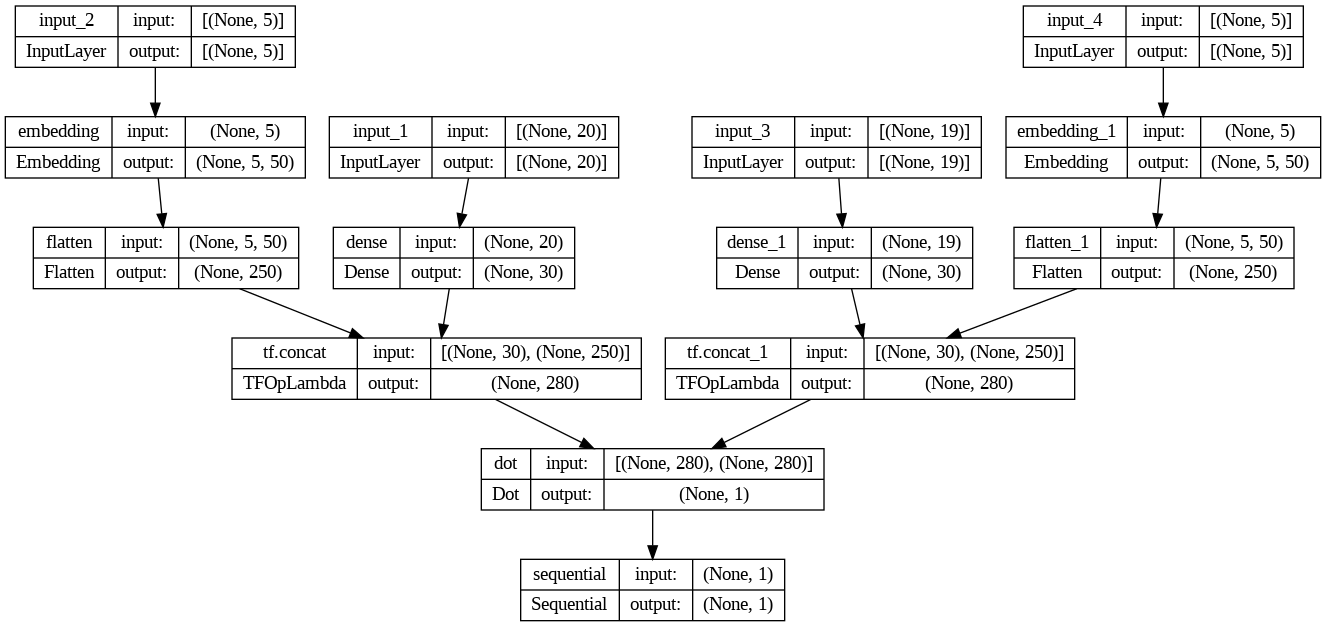

In [30]:
from tensorflow.keras.utils import plot_model

# Specify the inputs and output of the model
model = tf.keras.Model([inlayer_lansia, inlayer_caregiver, inlayer_lansia_city, inlayer_caregiver_city], output)

model.summary()
plot_model(model, show_shapes=True, to_file='/content/Machine-Learning/Caregiver-Recommendation/Model-Development/content_based_model.png')

In [31]:
# tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss=cost_fn,
              metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

In [32]:
from sklearn.model_selection import train_test_split

caregiver_train, caregiver_test= train_test_split(caregiver_input,random_state = 42, train_size=0.8)
lansia_train, lansia_test= train_test_split(lansia_input,random_state = 42, train_size=0.8)

caregiver_city_train, caregiver_city_test= train_test_split(caregiver_city_input,random_state = 42, train_size=0.8)
lansia_city_train, lansia_city_test= train_test_split(lansia_city_input,random_state = 42, train_size=0.8)

y_train, y_test= train_test_split(y_matching, random_state = 42, train_size=0.8)

In [33]:
print("lansia train: ", lansia_train.shape)
print("lansia test: ", lansia_test.shape)
print("caregiver train: ", caregiver_train.shape)
print("caregiver test: ", caregiver_test.shape)

print("\nlansia city train: ", lansia_city_train.shape)
print("lansia city test: ", lansia_city_test.shape)
print("caregiver city train: ", caregiver_city_train.shape)
print("caregiver city test: ", caregiver_city_test.shape)

print("\ny train: ", y_train.shape)
print("y test: ", y_test.shape)

lansia train:  (1600, 20)
lansia test:  (400, 20)
caregiver train:  (1600, 19)
caregiver test:  (400, 19)

lansia city train:  (1600, 5)
lansia city test:  (400, 5)
caregiver city train:  (1600, 5)
caregiver city test:  (400, 5)

y train:  (1600, 1)
y test:  (400, 1)


In [34]:
# tf.random.set_seed(1)

history = model.fit([lansia_train, caregiver_train, lansia_city_train, caregiver_city_train], y_train, epochs=70, batch_size = 64, validation_data = ([lansia_test, caregiver_test, lansia_city_test, caregiver_city_test], y_test))

Epoch 1/70
25/25 [==============================] - 5s 34ms/step - loss: 1.4277 - mean_absolute_error: 0.2942 - root_mean_squared_error: 0.3272 - val_loss: 1.4051 - val_mean_absolute_error: 0.2950 - val_root_mean_squared_error: 0.3282
Epoch 2/70
25/25 [==============================] - 0s 12ms/step - loss: 1.3790 - mean_absolute_error: 0.2869 - root_mean_squared_error: 0.3206 - val_loss: 1.3571 - val_mean_absolute_error: 0.2877 - val_root_mean_squared_error: 0.3217
Epoch 3/70
25/25 [==============================] - 0s 16ms/step - loss: 1.3319 - mean_absolute_error: 0.2794 - root_mean_squared_error: 0.3141 - val_loss: 1.3105 - val_mean_absolute_error: 0.2801 - val_root_mean_squared_error: 0.3149
Epoch 4/70
25/25 [==============================] - 0s 16ms/step - loss: 1.2857 - mean_absolute_error: 0.2713 - root_mean_squared_error: 0.3068 - val_loss: 1.2648 - val_mean_absolute_error: 0.2712 - val_root_mean_squared_error: 0.3070
Epoch 5/70
25/25 [==============================] - 0s 16ms/

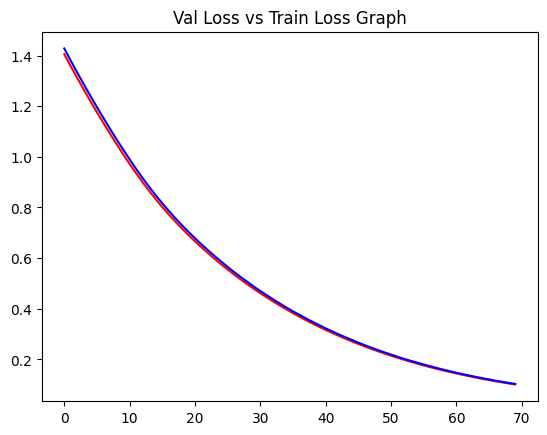

<Figure size 640x480 with 0 Axes>

In [35]:
# summarize history for loss
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], color='r', label='Val Loss')
plt.plot(history.history['loss'], color='b', label='Train Loss')
plt.title('Val Loss vs Train Loss Graph')
plt.show()
plt.savefig('/content/Machine-Learning/Caregiver-Recommendation/Model-Development/val_train_loss.png')

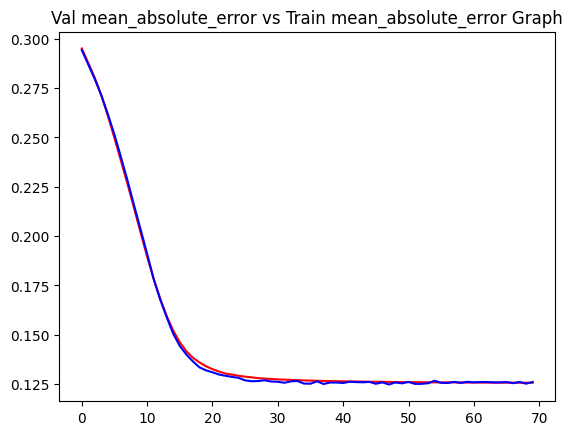

<Figure size 640x480 with 0 Axes>

In [36]:
plt.plot(history.history['val_mean_absolute_error'], color='r', label='Val mean_absolute_error')
plt.plot(history.history['mean_absolute_error'], color='b', label='Train mean_absolute_error')
plt.title('Val mean_absolute_error vs Train mean_absolute_error Graph')
plt.show()
plt.savefig("/content/Machine-Learning/Caregiver-Recommendation/Model-Development/val_train_MAE")

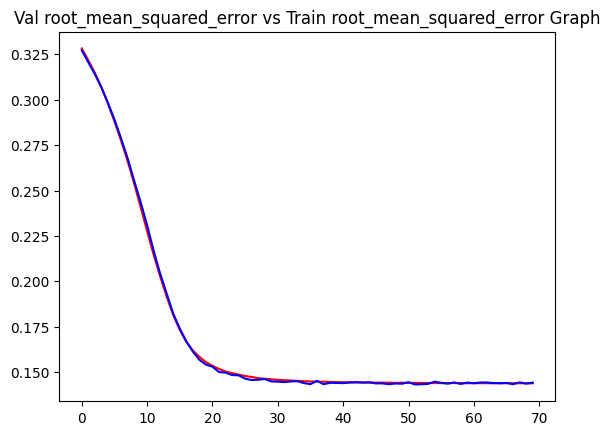

<Figure size 640x480 with 0 Axes>

In [37]:
plt.plot(history.history['val_root_mean_squared_error'], color='r', label='Val root_mean_squared_error')
plt.plot(history.history['root_mean_squared_error'], color='b', label='Train root_mean_squared_error')
plt.title('Val root_mean_squared_error vs Train root_mean_squared_error Graph')
plt.show()
plt.savefig("/content/Machine-Learning/Caregiver-Recommendation/Model-Development/val_train_RMSE")

In [38]:
# import numpy as np

def get_id(output):
  sorted_index = np.argsort(-output, axis=0).reshape(-1).tolist() #dimulai dari 0

  sorted_index = [idx + 1 for idx in sorted_index] #plus 1 karena id caregiver tidak dimulai dari 0
  return sorted_index

In [39]:
import numpy as np

new_id = 2001
new_Mobilitas = 2
new_Penyakitlain = 0
new_Hipertensi = 0
new_Diabetes = 1
new_Reumatik = 0
new_Penyakitjantung = 0
new_Asma = 0
new_Stroke = 1
new_Mengurusrumah = 1
new_Membantupergerakandanaktivitasfisik = 4
new_Membantukonsumsiobatdanmakanan = 4
new_Mengecekkesehatanrutinsecaramandiri = 1 
new_Mendampingidanmenjaga = 4
new_Memasangkanalatmediskhusus = 1
new_Memeriksakanrutinkedokter = 1
new_Indonesia = 0
new_Inggris = 0
new_Jawa = 1
new_Sunda = 0
new_Melayu = 0

lansia_vec = np.array([new_id, new_Mobilitas, new_Penyakitlain, new_Hipertensi,
                        new_Diabetes, new_Reumatik, new_Penyakitjantung, new_Asma,
                        new_Stroke, new_Mengurusrumah, new_Membantupergerakandanaktivitasfisik,
                        new_Membantukonsumsiobatdanmakanan, new_Mengecekkesehatanrutinsecaramandiri,
                        new_Mendampingidanmenjaga, new_Memasangkanalatmediskhusus,
                        new_Memeriksakanrutinkedokter, new_Indonesia, new_Inggris, new_Jawa,
                        new_Sunda, new_Melayu])

In [40]:
caregiver_vecs = np.array(caregiver_input)

In [41]:
caregiver_id = np.array(caregiver_df['id'])

In [42]:
def gen_user_vecs(user_vec, num_item):
    user_vecs = [user_vec] * num_item
    return user_vecs

In [43]:
# generate and replicate the user vector to match the number movies in the data set.
lansia_vecs = gen_user_vecs(lansia_vec[1:],len(caregiver_vecs))

In [44]:
# scale our user and item vectors
suser_vecs = scalerLansia.transform(lansia_vecs)
sitem_vecs = scalerCaregiver.transform(caregiver_vecs)

# make a prediction
y_p = model.predict([suser_vecs, sitem_vecs, lansia_city_input, caregiver_city_input])

y_p

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


63/63 [==============================] - 0s 2ms/step


array([[0.80550754],
       [0.80599254],
       [0.8053778 ],
       ...,
       [0.80539984],
       [0.8056086 ],
       [0.80572575]], dtype=float32)

In [45]:
get_id(y_p)

[1598,
 301,
 16,
 1757,
 1747,
 1736,
 1703,
 1513,
 1642,
 1739,
 1196,
 1530,
 856,
 1663,
 1409,
 644,
 269,
 1961,
 1379,
 303,
 1708,
 1343,
 1447,
 1813,
 1776,
 529,
 1702,
 45,
 1772,
 1989,
 1897,
 1782,
 1617,
 1620,
 80,
 1386,
 1399,
 1119,
 1389,
 1394,
 291,
 1216,
 681,
 1333,
 1154,
 198,
 257,
 240,
 1475,
 834,
 667,
 349,
 154,
 105,
 453,
 1958,
 41,
 363,
 263,
 1550,
 1325,
 1704,
 474,
 629,
 1314,
 1944,
 1468,
 1524,
 1711,
 935,
 1054,
 99,
 1605,
 1762,
 1419,
 1192,
 593,
 150,
 1950,
 1695,
 347,
 334,
 1666,
 570,
 1970,
 1894,
 705,
 798,
 1317,
 1662,
 755,
 1429,
 1914,
 137,
 1069,
 1915,
 92,
 1164,
 1721,
 1471,
 1921,
 649,
 1501,
 1751,
 1571,
 1887,
 915,
 1467,
 1486,
 905,
 1309,
 1509,
 1322,
 1814,
 1880,
 1862,
 208,
 1595,
 1839,
 256,
 949,
 985,
 1639,
 1557,
 1997,
 738,
 1840,
 952,
 1933,
 1651,
 1383,
 498,
 761,
 1455,
 1448,
 852,
 1681,
 709,
 1919,
 963,
 1128,
 265,
 1538,
 1136,
 1857,
 1735,
 776,
 1753,
 211,
 533,
 1712,
 144

In [46]:
# # sort the results, highest prediction first
# sorted_index = np.argsort(-y_p,axis=0).reshape(-1).tolist()  #negate to get largest rating first
# sorted_yp   = y_p[sorted_index]
# sorted_items = caregiver_id[sorted_index]  #using unscaled vectors for display

In [47]:
# print(sorted_yp[:10].tolist())

In [48]:
# print(sorted_items[:10])

In [49]:
saved_model_path = "/content/Machine-Learning/Caregiver-Recommendation/Model-Development/my_model.h5"
model.save(saved_model_path)

In [50]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [51]:
!tensorflowjs_converter --input_format=keras {saved_model_path} /content/Machine-Learning/Caregiver-Recommendation/Model-Development/

2023-05-29 05:49:00.699470: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
